# Round 7-1: Weight–topology correlations in social networks

In this exercise, we will do some weighted network analysis using a social network data set describing private messaging in a Facebook-like web-page (Data originally from http://toreopsahl.com/datasets/ ).
In the network, each node corresponds to a user of the website and link weights describe the total number of messages exchanged between users. 

In the file `OClinks_w_undir.edg`, the three entries of each row describe one link:
`(node_i node_j w_ij)`,
where the last entry `w_ij` is the weight of the link between nodes `node_i` and `node_j`.

You can use this notebook or the accompanying Python template (weight_topology_correlations.py) to get started. The notebook and template have some functions that will help you. Do NOT modify these functions. You may start modifying the code after the header **"Begin of the exercise"**.

`scipy.stats.binned_statistic` function is especially useful throughout this exercise.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx
from scipy.stats import binned_statistic

In [2]:
def create_linbins(start, end, n_bins):
    """
    Creates a set of linear bins.

    Parameters
    -----------
    start: minimum value of data, int
    end: maximum value of data, int
    n_bins: number of bins, int

    Returns
    --------
    bins: a list of linear bin edges
    """
    bins = np.linspace(start, end, n_bins)
    return bins

In [3]:
def create_logbins(start, end, n_log, n_lin=0):
    """
    Creates a combination of linear and logarithmic bins: n_lin linear bins 
    of width 1 starting from start and n_log logarithmic bins further to
    max.

    Parameters
    -----------
    start: starting point for linear bins, float
    end: maximum value of data, int
    n_log: number of logarithmic bins, int
    n_lin: number of linear bins, int

    Returns
    -------
    bins: a list of bin edges
    """
    if n_lin == 0:
        bins = np.logspace(np.log10(start), np.log10(end), n_log)
    elif n_lin > 0:
        bins = np.array([start + i for i in range(n_lin)] + list(np.logspace(np.log10(start + n_lin), np.log10(end), n_log)))
    return bins

## Data
Let us load the data from the right directory and assign the names for all the plots we will save. If you run this notebook in your machine, please specify the right directory.

In [4]:
# Select data directory
import os
if os.path.isdir('/coursedata'):
    course_data_dir = '/coursedata'
elif os.path.isdir('../data'):
    course_data_dir = '../data'
else:
    # Specify course_data_dir on your machine
    course_data_dir = 'some_path'

print('The data directory is %s' % course_data_dir)

network_path = os.path.join(course_data_dir, 'OClinks_w_undir.edg')

net_name = 'fb_like'
# TODO: replace with a path where to save the 1-CDF plot
path = './ccdfs_' + net_name + '.pdf'
# TODO: replace with a base path where to save the average link weight scatter
# A scale-related suffix will be added to this base path so the figures will not overwritten
base_path = './s_per_k_vs_k_'
# TODO: replace with a base path where to save the link neighborhood overlap plot
save_path_linkneighborhoodplot = 'O_vs_w_' + net_name + '.pdf'

The data directory is /coursedata


In [5]:
#Let's read the network file
network = nx.read_weighted_edgelist(network_path)

# Begin of the exercise
Write your code here to analyze the social network dataset. 

### a. Complementary cumulative distribution

Before performing more sophisticated analysis, it is always good to get some idea on what the network is like. To this end, plot the complementary cumulative distribution (1-CDF) for node degree $k$, node strength $s$ and link weight $w$.

- Show all three distributions in one plot using loglog-scale.
- Based on the plots, roughly estimate the 90th percentiles of the degree, strength, and weight distributions.

To achieve this, you will need to modify two functions: `get_link_weights` and  `plot_ccdf` first.

**Hints**:
- See the binning tutorial for help on computing the 1-CDFs.
- For getting node strengths, use `strengths = nx.degree(net, weight="weight")`
- As a check, calculate the maximum degree $k_\mathrm{max}$ and maximum strength $s_\mathrm{max}$. If everything is running okay so far, you should be getting $k_\mathrm{max}$ = 255 and $s_\mathrm{max}$ = 1546.0.

In [6]:
def get_link_weights(net):

    """
    Returns a list of link weights in the network.

    Parameters
    -----------
    net: a networkx.Graph() object

    Returns
    --------
    weights: list of link weights in net
    """

    # TODO: write a function to get weights of the links
    # Hints:
    # to get the links with their weight data, use net.edges(data=True)
    # to get weight of a single link, use (i, j, data) for each edge,
    # weight = data['weight']
    
    # YOUR CODE HERE
    weights = [data['weight'] for i,j,data in net.edges(data=True)]
    return weights

In [7]:
def plot_ccdf(datavecs, labels, xlabel, ylabel, num):

    """
    Plots in a single figure the complementary cumulative distributions (1-CDFs)
    of the given data vectors.

    Parameters
    -----------
    datavecs: data vectors to plot, a list of iterables
    labels: labels for the data vectors, list of strings
    styles = styles in which plot the distributions, list of strings
    xlabel: x label for the figure, string
    ylabel: y label for the figure, string
    num: an id of the figure, int or string
    """
    styles = ['-', '--', '-.']
    fig = plt.figure(num)
    ax = fig.add_subplot(111)
    for datavec, label, style in zip(datavecs,labels, styles):
        # TODO: calculate 1-CDF of datavec and plot it with ax.loglog()
        sorted_datavec = sorted(datavec)
        # YOUR CODE HERE
        ccdf = []
        n = len(sorted_datavec)
        for val1 in sorted_datavec:
            aux = 0
            for val2 in sorted_datavec:
                aux += (val1 <= val2)
            aux /= n
            ccdf.append(aux)
        ax.plot(sorted_datavec, ccdf, style, label=label)
    ax.set_xscale('log')
    ax.set_yscale('log') 
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.legend(loc=0)
    ax.grid()

    return fig

Maximum degree: 255
Maximum strength: 1546.0
1-CDF figure saved to ./ccdfs_fb_like.pdf


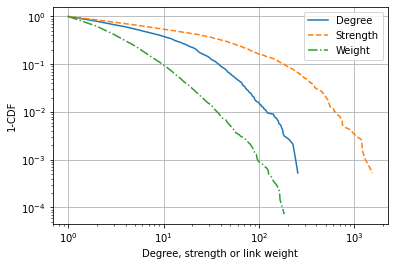

In [8]:
# Get the node degrees and strengths
degrees = nx.degree(network)
strengths = nx.degree(network, weight="weight")

# Now, convert the degree and strength into lists.
degree_vec = [d for n, d in degrees]
strength_vec = [s for n, s in strengths]

# Check the maxmimum degree and strength
print('Maximum degree: %d' % max(degree_vec))
print('Maximum strength: %.1f' % max(strength_vec))

# Then, compute the weights
weights = get_link_weights(network)

# Now let's create 1-CDF plots
datavecs = [degree_vec, strength_vec, weights]
num = 'a)' + net_name # figure identifier

# TODO: Set appropriate labels
labels = ['Degree', 'Strength', 'Weight']
xlabel = 'Degree, strength or link weight'
ylabel = '1-CDF'

fig = plot_ccdf(datavecs, labels, xlabel, ylabel, num)
fig.savefig(path)
print('1-CDF figure saved to ' + path)

### b. Average link weight per node
Next, we will study how the average link weight per node $\langle w \rangle =\frac{s}{k}$ behaves as a function of the node degree $k$. 

- Compute $s$, $k$, and $\langle w \rangle = \frac{s}{k}$ for each node.

- Make a scatter plot of all the data points of $\langle w \rangle$ as a function of $k$. Create two versions of the plots: one with linear and one with logarithmic $x$-axes.

- The large variance of the data can make the scatter plots a bit messy. To make the relationship between $\langle w \rangle$ and $k$ more visible, create bin-averaged versions of the plots, i.e., divide nodes into bins based on their degree and calculate the average $\langle w \rangle$ in each bin. Plot the bin-averaged versions on top of the scatter plots.

- Based on the plots, which of the two approaches (linear or logarithmic $x$-axes) suits better for presenting $\langle w \rangle$ as a function of $k$? Why?

**Hints**:
- For the bin-averaged plots, use bins that are consistent with the scale of the $x$-axis: bins with constant width for the linear scale and logarithmic bins for the logarithmic scale. If in trouble, see the binning tutorial for help.

- An example of how the scatter and bin-averaged plots may look like is shown in Fig.1 of the assignment PDF. Obviously, the number of bins are too few in these plots. Typically, it is better to use too many than too few bins. A good choice for the number of bins in this case would be 20.

- Check if each degree bin includes roughly the same number of nodes. Nonequal distribution of observations may obscure the results.

[  1.           2.           3.           4.           5.
   6.           7.84268452  10.25128341  13.39959695  17.51480193
  22.89384433  29.92486642  39.11521443  51.12804778  66.83019147
  87.35468468 114.18253888 149.24960501 195.08626112 255.        ]
255
Average link weight scatter saved to ./s_per_k_vs_k_linear_fb_like.pdf
Average link weight scatter saved to ./s_per_k_vs_k_log_fb_like.pdf


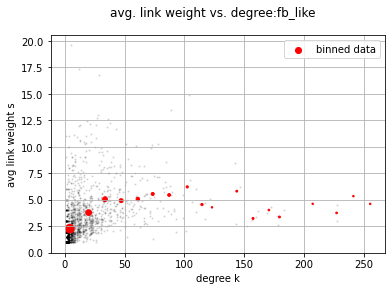

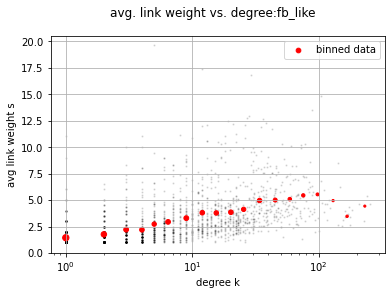

In [9]:
# average link weight per node
#TODO: calculate average link weight per node
# YOUR CODE HERE
av_weight = [s/k for s,k in zip(strength_vec,degree_vec)]

n_bins = 20
n_lin = 5
min_deg = min(degree_vec)
max_deg = max(degree_vec)
linbins = create_linbins(min_deg, max_deg, n_bins)
logbins = create_logbins(min_deg, max_deg, n_log=n_bins-n_lin, n_lin=n_lin)
print(logbins)
print(max_deg)
num = 'b) ' + net_name + "_"
alpha = 0.1 # transparency of data points in the scatter

# For each of linear and logarithmic versions, the full scatter plot and 
# the bin-averaged plot can be shown in one figure.

for bins, scale in zip([linbins, logbins], ['linear', 'log']):
    fig = plt.figure(num + scale)
    ax = fig.add_subplot(111)
    # mean degree value of each degree bin
    degree_bin_means, _, _ = ([], [], [])
    # TODO: Use binned_statistic to get mean degree of each bin
    # YOUR CODE HERE
    degree_bin_means, _, _ = binned_statistic(x = degree_vec,
                                              values = degree_vec,
                                              bins = bins,
                                              statistic = 'mean')

    # mean of the average link weights in each degree bin
    av_weight_bin_means, _, _ = ([], [], [])
    # TODO: Use binned_statistic to get mean of average link weights in each bin
    # YOUR CODE HERE
    av_weight_bin_means, _, _ = binned_statistic(x = degree_vec,
                                                values = av_weight,
                                                bins = bins,
                                                statistic = 'mean')
    # number of points in each degree bin
    counts, _, _ = ([], [], [])
    # TODO: Use binned_statistic to get number of data points in each bin
    # YOUR CODE HERE
    counts, _, _ = binned_statistic(x = degree_vec,
                                    values = degree_vec,
                                    bins = bins,
                                    statistic = 'count')

    # Scatter plot all points
    ax.scatter(degree_vec, av_weight, marker='o', color='k', s=1.5, alpha=alpha)

    # Plotting the bin averages
    # The marker size is scaled by number of data points in the bin
    ax.scatter(degree_bin_means,
               av_weight_bin_means,
               marker='o',
               color='r',
               s=2*np.sqrt(counts),
               label='binned data')
    ax.set_xscale(scale)
    min_max = np.array([min_deg, max_deg])
    
    # TODO: Set appropriate labels
    ax.set_xlabel('degree k')
    ax.set_ylabel('avg link weight s')
    ax.set_ylim(bottom=0.0)
    ax.grid()

    ax.legend(loc='best')
    plt.suptitle('avg. link weight vs. degree:' + net_name)
    save_path = base_path + scale + '_' + net_name + '.pdf'
    fig.savefig(save_path)
    print('Average link weight scatter saved to ' + save_path)

### c. Link neighborhood overlap
Lets consider a link between nodes $i$ and $j$. For this link, *link neighborhood overlap* $O_{ij}$ is defined as the fraction of common neighbors of $i$ and $j$ out of all their neighbors: $O_{ij}=\frac{n_{ij}}{\left(k_i-1\right)+\left(k_j-1\right)-n_{ij}}.$

According to the Granovetter hypothesis, link neighborhood overlap is an increasing function of link weight in social networks. Your task is now to find out whether this is the case also for the present data set by visualizing it in an appropriate way. Use the binning strategy (linear or logarithmic) that is most suitable for this case. 

- Calculate the link neighborhood overlap for each link. To do this, you will need to modify the `get_link_overlap` function.

- Create a scatter plot showing the overlaps as a function of link weight.

- As in b), produce also a bin-averaged version of the plot. Use a binning strategy that is most suitable for this case. You should find a reasonable number of bins, which, in this case, will be between 10 and 30. Specify how many bins you used.

- In the end, you should be able to spot a subtle trend in the data. Based on your plot, show that the trend is in accordance with the Granovetter hypothesis.

In [10]:
def get_link_overlap(net):
    """
    Calculates link overlap: 
    O_ij = n_ij / [(k_i - 1) + (k_j - 1) - n_ij]

    Parameters
    -----------
    net: a networkx.Graph() object

    Returns
    --------
    overlaps: list of link overlaps in net
    """

    # TODO: write a function to calculate link neighborhood overlap
    # Hint: for getting common neighbors of two nodes, use
    # set datatype and intersection method

    overlaps = []
    # YOUR CODE HERE
    for (i, j) in net.edges():
        n_i = set(net.neighbors(i))
        n_j = set(net.neighbors(j))
        n_ij = len(n_i.intersection(n_j))
        
        k_i = nx.degree(net, i)
        k_j = nx.degree(net, j)
        
        if n_ij == 0:
            O_ij = 0
        else:
            O_ij = n_ij / ((k_i - 1) + (k_j - 1) - n_ij)
        overlaps.append(O_ij)
    return overlaps

[  1.           2.           3.           4.           5.
   6.           6.91983423   7.9806843    9.20416874  10.61522032
  12.24259416  14.1194537   16.28404651  18.78048375  21.65963906
  24.9801853   28.80979023  33.22649545  38.32030678  44.19502844
  50.97037846  58.78442829  67.79641654  78.18999401  90.1769662
 104.00160963 119.94564977 138.33400222 159.54139403 184.        ]
Link neighborhood overlap scatter saved as O_vs_w_fb_like.pdf


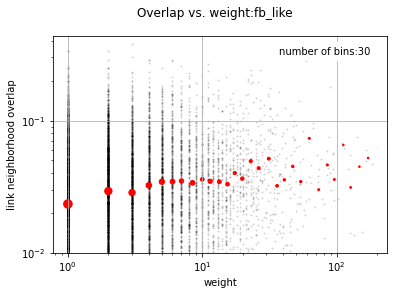

In [11]:
# Get link neighborhood overlaps
overlaps = get_link_overlap(network)

# creating link neighborhood overlap scatter
num = 'd) + net_name'
fig = plt.figure(num)
ax = fig.add_subplot(111)

# TODO: Change the number of bins to the number you find reasonable between 10 and 30
n_bins = 30
n_lin = 5
min_w = np.min(weights)
max_w = np.max(weights)

linbins = create_linbins(min_w, max_w, n_bins)
logbins = create_logbins(min_w, max_w, n_log=n_bins-n_lin, n_lin=n_lin)
print(logbins)

# TODO: try both linear and logarithmic bins, select the best one
# Specify the scale for x-axis that is consitent with the binning strategy
bins = logbins
scale = 'log' 

# mean weight value of each weight bin
weight_bin_means, _, _ = ([], [], [])
# TODO: Use binned_statistic to get mean weight of each bin
# YOUR CODE HERE
weight_bin_means, _, _ = binned_statistic(x = weights,
                                          values = weights,
                                          bins = bins,
                                          statistic = 'mean')

# mean link neighborhood overlap of each weight bin
overlap_bin_means, _, _ = ([], [], [])
# TODO: Use binned_statistic to get mean overlap of each bin 
# YOUR CODE HERE
overlap_bin_means, _, _ = binned_statistic(x = weights,
                                          values = overlaps,
                                          bins = bins,
                                          statistic = 'mean')

# number of points in each weigth bin
counts, _, _ = ([], [], [])
# TODO: Use binned_statistic to get number of data points
# YOUR CODE HERE
counts, _, _ = binned_statistic(x = weights,
                                values = weights,
                                bins = bins,
                                statistic = 'count')


# plotting all points (overlap)
ax.scatter(weights, overlaps, marker="o", color='k', s=1.5, alpha=alpha)
# plotting bin average, marker size scaled by number of data points in the bin
ax.scatter(weight_bin_means,
           overlap_bin_means,
           s=np.sqrt(counts)+1,
           marker='o',
           color='r')

ax.set_xscale(scale)
ax.set_yscale('log')
ax.set_ylim(bottom=0.01)
ax.grid()

#TODO: Set appropriate labels
ax.set_xlabel('weight')
ax.set_ylabel('link neighborhood overlap')
ax.text(0.95, 0.95, "number of bins:" + str(n_bins), 
        horizontalalignment='right', verticalalignment='top', 
        backgroundcolor='w', transform=ax.transAxes)

fig.suptitle('Overlap vs. weight:' + net_name)
fig.savefig(save_path_linkneighborhoodplot)
print('Link neighborhood overlap scatter saved as ' + save_path_linkneighborhoodplot)